# Creating next word for a Sonnet using NLP

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

## Data Loading and preprocessing

In [ ]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 34.9MB/s]


## Model Architecture

In [ ]:
##            Build model with LSTM    good results     ##############################
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_6 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 3211)              966511    
                                                                 
Total params: 1,588,811
Trainable params: 1,588,811
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
### START CODE HERE
# model = Sequential()
# model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
# model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
# model.add(Dropout(0.2))# A dropout layer)
# model.add(LSTM(100))# Another LSTM Layer)
# model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
# model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# # Pick an optimizer
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
# ### END CODE HERE

In [ ]:
 history = model.fit(predictors, label, epochs=30, verbose=1)

## Model Accuracy 

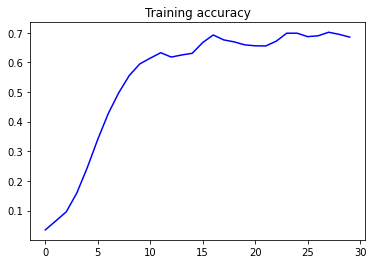

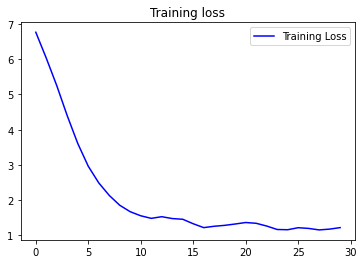

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Model validation

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
seed_text = "FROM fairest creatures we"     #  next word would be "desire"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

FROM fairest creatures we desire increase new made thou age unbred he's for thee a growth of riper days art elder will bright bright end must thee thee i find ' me than weeds thee thee thee ' a king this growth a till even thence this harvest such slander and win me some disgrace knowing with the work ' of single his prove more guest foes due glass thee more nearly ' his gains up to go me die grow cross due to thee posterity dost old offences of affections new found eyes well horse ' deep assail'd i'll mine thy eyes '


## Conclusion

* This notebook discussed an NLP model which generates next words of sonnet 